In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,269 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pytesseract

In [ ]:
import cv2
import pytesseract

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Remove noise from the thresholded image
    denoised_image = cv2.fastNlMeansDenoising(binary_image, None, 30, 7, 21)

    return image, denoised_image

In [ ]:
def extract_text_and_boxes(image, binary_image):
    boxes = pytesseract.image_to_data(binary_image, output_type=pytesseract.Output.DICT)
    n_boxes = len(boxes['level'])
    extracted_text = ""
    total_confidence = 0
    valid_boxes = 0

    for i in range(n_boxes):
        conf = int(boxes['conf'][i])
        if conf >= 60:  # Only consider boxes with a valid confidence level
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            extracted_text += boxes['text'][i] + "\n"
            total_confidence += conf
            valid_boxes += 1

    average_confidence = total_confidence / valid_boxes if valid_boxes > 0 else 0
    return extracted_text.strip(), average_confidence

In [ ]:
# Using an example
image_path = "pvx38c00-page06_2 copy.png"
original_image, binary_image = preprocess_image(image_path)
extracted_text, average_confidence = extract_text_and_boxes(original_image, binary_image)

In [ ]:
# Print the extracted text and average confidence
print("Extracted Text: ", extracted_text, end= " ")
print("\nAverage Confidence Level:", average_confidence)

Extracted Text:  Mr.
Steve
Atchley
September
21,
1999
Page
2
3.
Expenses.
(a)
Event
Expenses.
For
reasonable,
competitively
priced
expenses
incurred
in
connection
with
the
California
School,
Philip
Morris
will
reimburse
I-MAG,
at
cost,
in
accordance
with
the
budget
set
forth
in
Exhibit
B.
Expenses
in
excess
of
$25
must
be
submitted
with
receipts.
Expenses
in
excess
of
$250
must
be
approved
in
advance
by
Philip
Morris.
Expenses
included
in
Exhibit
B
are
deemed
to
be
reasonable
and
approved.
I-MAG
may
not
apply
funds
allocated
to
one
budget
category
to
another
category
without
the
prior,
written
approval
of
Philip
Morris.
Total
reimbursement
of
expenses
incurred
in
connection
with
the
California
School,
throughout
the
term
of
the
Agreement
will
not
exceed
$32,360
without
the
advance,
written
approval
of
Philip
Morris.
For
reasonable,
competitively
priced
expenses
incurred
in
connection
with
the
Florida
Schools,
Philip
Morris
will
reimburse
at
cost,
in
accordance
with
the
budget
set
forth

In [ ]:
from google.colab.patches import cv2_imshow

Image with Bounding Boxes


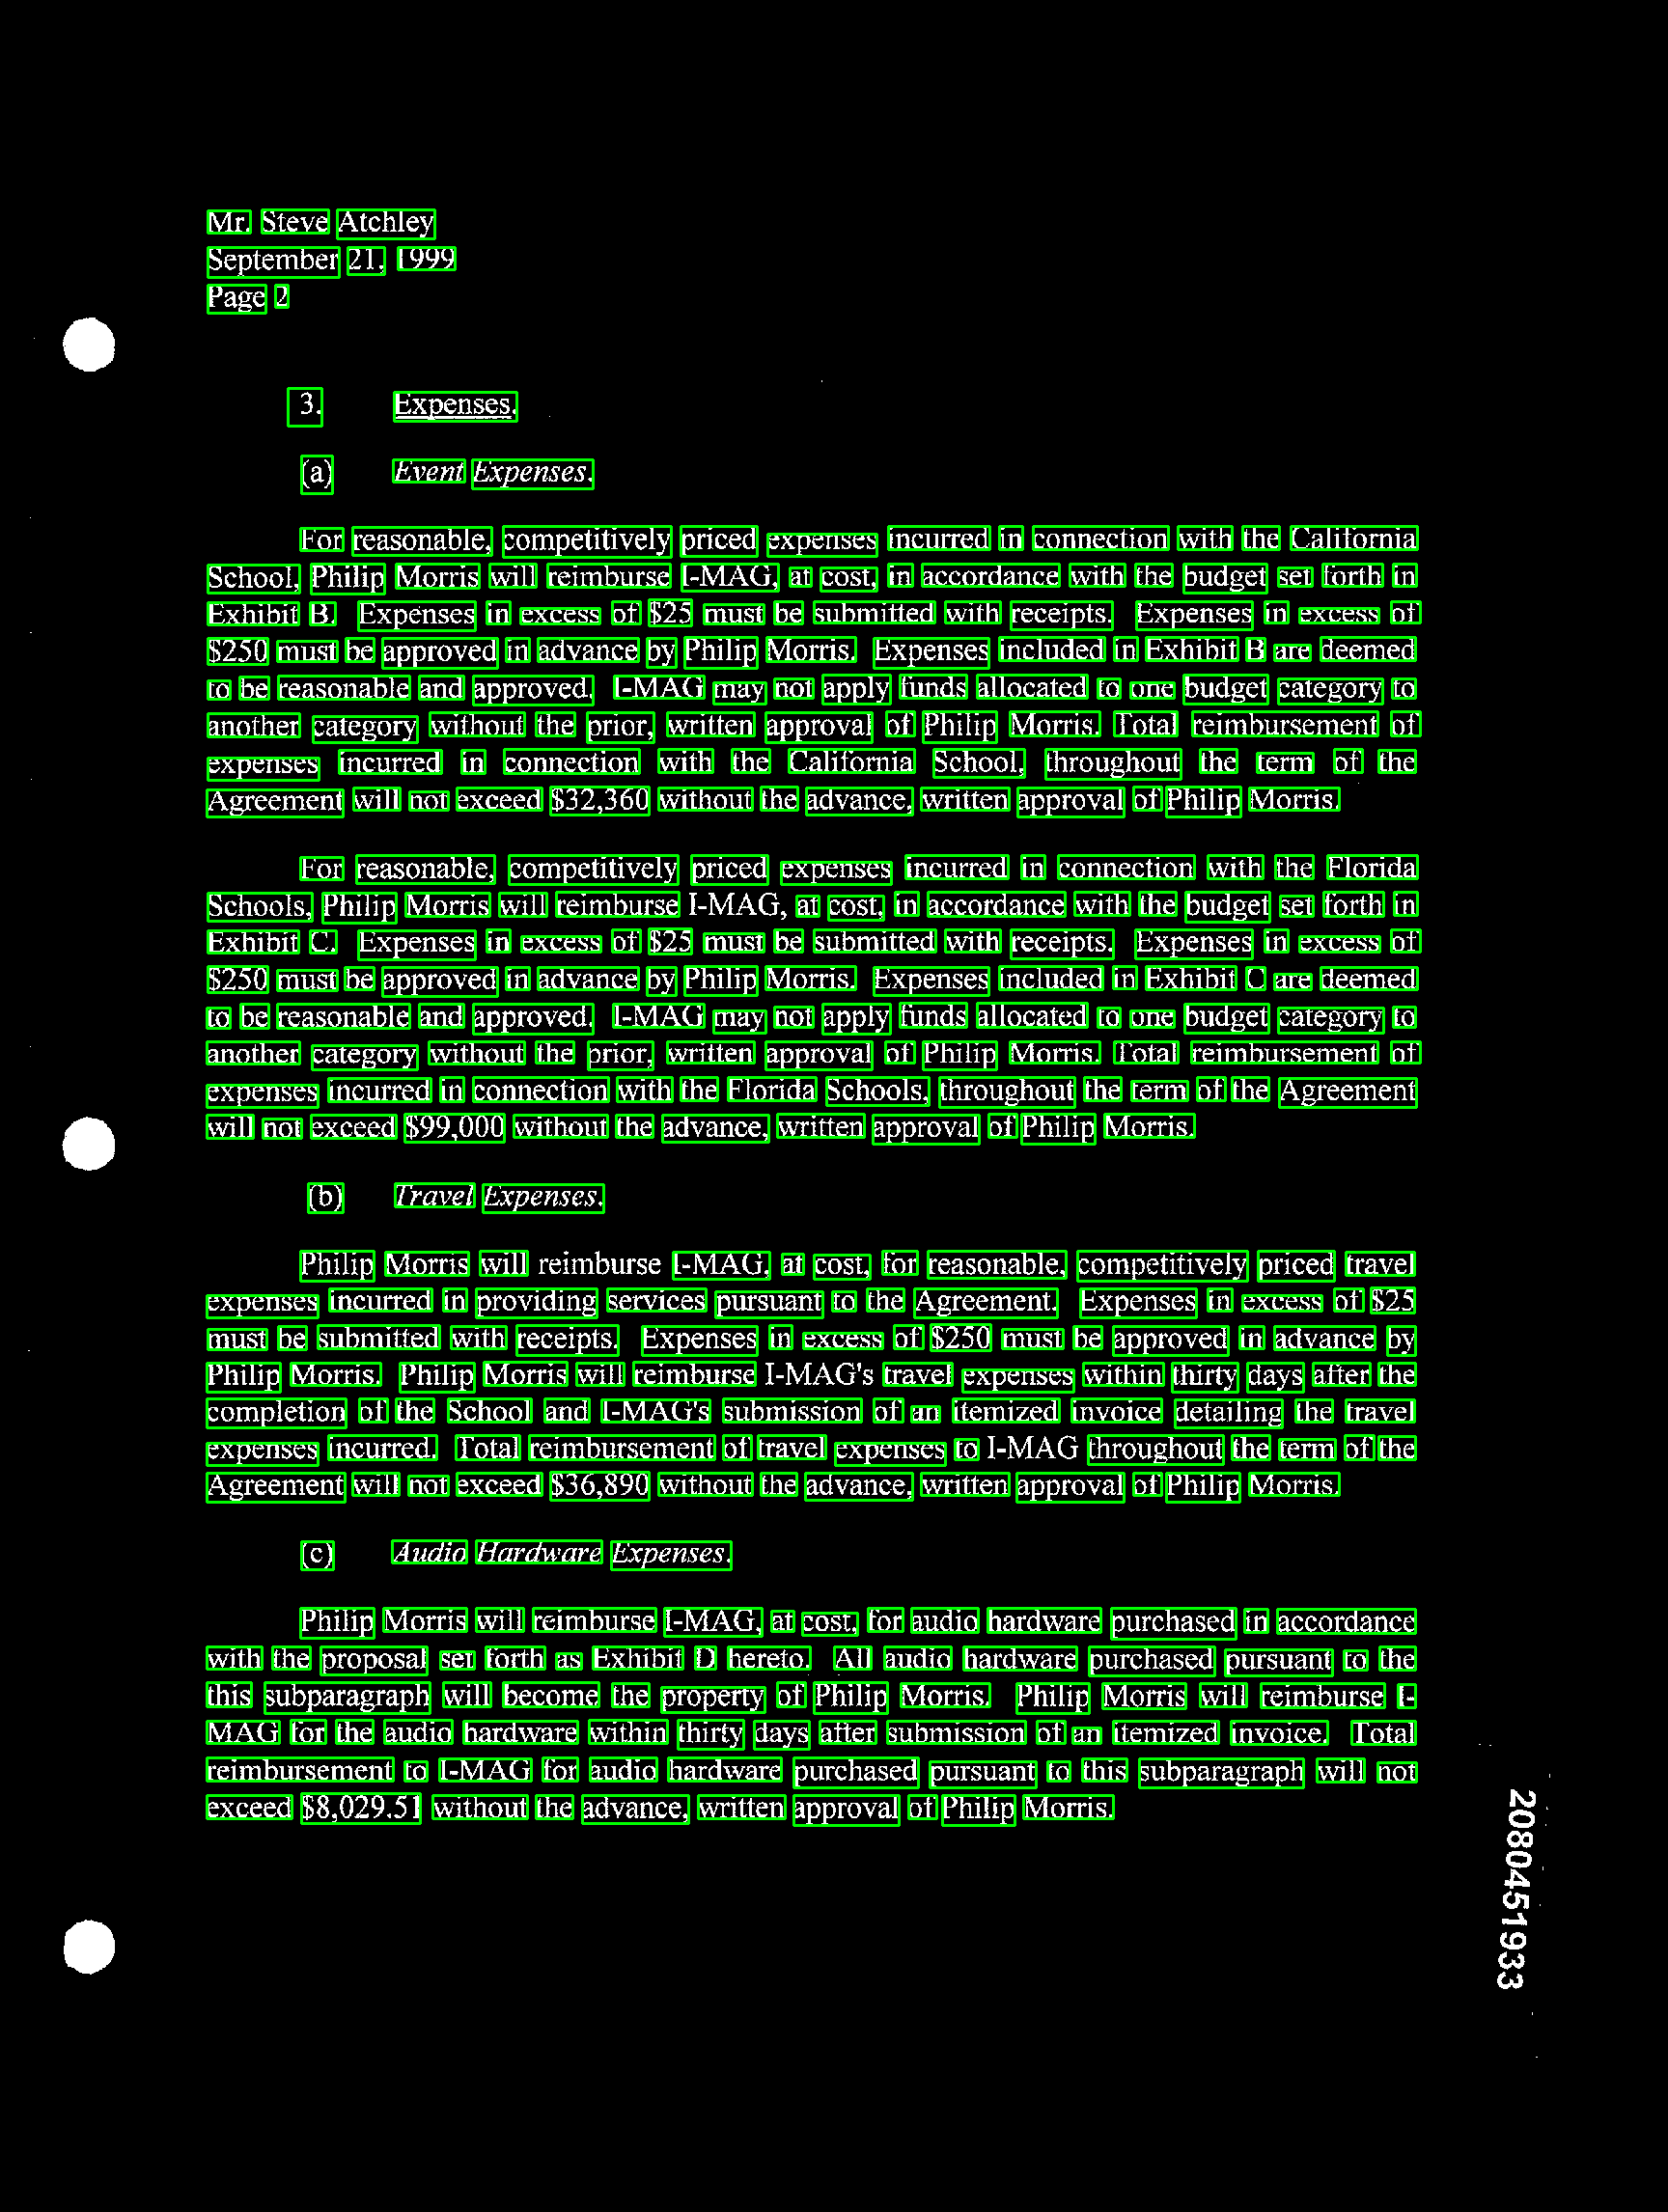

In [ ]:
# Display the image with bounding boxes
print("Image with Bounding Boxes")
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()